# Multiple Regression Model

In [1]:
import pandas as pd

Mars_df = pd.read_csv('MarsCrater.csv')
Mars_df.head()

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,,84.367,108.746,82.10,0.22,,,,0
1,01-000001,Korolev,72.760,164.464,82.02,1.97,Rd/MLERS,HuBL,,3
2,01-000002,,69.244,-27.240,79.63,0.09,,,,0
3,01-000003,,70.107,160.575,74.81,0.13,,,,0
4,01-000004,,77.996,95.617,73.53,0.11,,,,0


So, we will predict depth of crators. This is a target. And diameters of craters will be our main explanotary variable. Then we append other explanotary variables and will compare the results of models.

In [6]:
diam = Mars_df['DIAM_CIRCLE_IMAGE'].to_numpy().reshape(-1, 1)
latitude = Mars_df['LATITUDE_CIRCLE_IMAGE'].to_numpy().reshape(-1, 1)
longitude = Mars_df['LONGITUDE_CIRCLE_IMAGE'].to_numpy().reshape(-1, 1)
layers = Mars_df['NUMBER_LAYERS'].to_numpy().reshape(-1, 1)
depth = Mars_df['DEPTH_RIMFLOOR_TOPOG'].values

We can center all of variables with sklearn:

In [3]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(diam)
diam = scaler.transform(diam)

scaler = preprocessing.StandardScaler().fit(latitude)
latitude = scaler.transform(latitude)

scaler = preprocessing.StandardScaler().fit(longitude)
longitude = scaler.transform(longitude)

scaler = preprocessing.StandardScaler().fit(layers)
layers = scaler.transform(layers)

In [8]:
import statsmodels.formula.api as smf

C:\Users\M\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
results = smf.ols('depth ~ diam + layers^2 + latitude + longitude', data=Mars_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  depth   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                 5.183e+04
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:58:39   Log-Likelihood:             1.1685e+05
No. Observations:              384343   AIC:                        -2.337e+05
Df Residuals:                  384338   BIC:                        -2.336e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0992      0.002    -48.041      0.0

So, R^2  has not changed too much. But now we take into account the other factors. All of the explanatory variables have P-value lower than 0.005. It means that they have a connection to response variable. Diameters and number of layers have positive correlation with depth, and latitude and longitude have some nrgative correlations.

And our dataset does not have enough variables: only depth, diameter and layers are sutable ones. Yes, we use also latitude and longitude, biut it is not very meaningful.

In [19]:
import statsmodels.api as sm

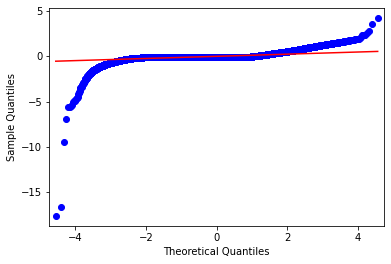

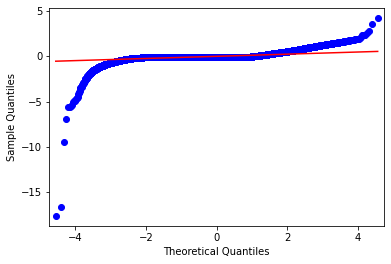

In [20]:
sm.qqplot(results.resid, line='r')

Quantiles don't look very good. But the model is simple, and the dataset is large.

Text(0.5, 0, 'Observation Number')

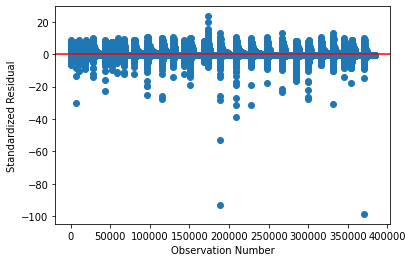

In [24]:
import matplotlib.pyplot as plt
stdres=pd.DataFrame(results.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

It also is not very good. But we have about 40.000 craters, some features and very-very-very simple model. I mean, in tis case we should not expect high results of model.

In [ ]:
# leverage plot
fig3=sm.graphics.influence_plot(results, size=8)
print(fig3)